In [1]:
#Class to analyze the breakdown of the scores

#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import warnings
from sklearn.model_selection import train_test_split
import pickle
from MVDD.MVDD import MVDD
import MVDD.MVDD_Generator as mvGen

plt.rc('font', size=12)
warnings.filterwarnings('ignore')

In [2]:
def getScoreHist(scores, label):
    plt.figure(figsize=(7,5))
    bins = np.arange(7) - 0.5
    plt.hist(scores, bins)
    plt.xticks(range(6))
    plt.xlim([0, 6])
    plt.xlabel("Score")
    plt.ylabel("Histogram Count")
    plt.title("Histogram for "+ label)
    plt.savefig("Figures/" + label+" Histogram")
    
    labels = [1, 2, 3, 4, 5]

    for l in labels:
        count = scores.tolist().count(l)
        print("Score", l, ": Count", count, ", Percent", round(count/len(scores), 3) )
    
    

## Hemo

In [3]:
hemoData = pd.read_csv('../Data/Preprocessed Data/Cluster_Hemo.csv', index_col='DEIDNUM')
allScores = hemoData['Score']
death = hemoData['ScoreDeath']
rehosp = hemoData['ScoreRehosp']
readm = hemoData['ScoreReadmission']
hemoData

,RAP,PAS,PAD,PAMN,PCWP,PCWPMod,PCWPA,PCWPMN,CO,CI,...,PAPP,SVR,RAT,PPRatio,Age,EjF,Score,ScoreDeath,ScoreRehosp,ScoreReadmission
DEIDNUM,,,,,,,,,,,,,,,,,,,,,
72,24.0,42.0,24.0,30.0,36.0,36.0,36.0,36.0,2.20,1.60,...,0.428571,5357.575758,0.666667,0.266667,88.0,25.0,5,5,5,4
72,18.0,42.0,24.0,30.0,24.0,24.0,24.0,28.0,3.10,2.00,...,0.428571,3509.677419,0.750000,0.272727,88.0,25.0,3,3,4,2
81,10.0,40.0,20.0,27.0,18.0,18.0,18.0,20.0,4.52,2.02,...,0.500000,1982.300885,0.555556,0.242857,69.0,20.0,1,2,1,1
81,12.0,35.0,15.0,25.0,17.0,17.0,17.0,14.0,4.65,2.08,...,0.571429,1772.043011,0.705882,0.571429,69.0,20.0,1,2,1,1
814,3.0,51.0,19.0,30.0,18.0,18.0,18.0,18.0,4.10,2.00,...,0.627451,2621.138211,0.166667,0.566667,58.0,NaN,3,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,57.0,30.0,4,4,3,5
99302,19.0,87.0,37.0,54.0,44.0,44.0,44.0,NaN,3.90,2.00,...,0.574713,2666.666667,0.431818,0.642857,41.0,15.0,5,5,5,4
99302,11.0,70.0,28.0,44.0,28.0,28.0,28.0,NaN,5.30,2.70,...,0.600000,2440.251572,0.392857,1.088608,41.0,15.0,3,3,4,2


Score 1 : Count 48 , Percent 0.115
Score 2 : Count 142 , Percent 0.34
Score 3 : Count 137 , Percent 0.328
Score 4 : Count 34 , Percent 0.081
Score 5 : Count 57 , Percent 0.136


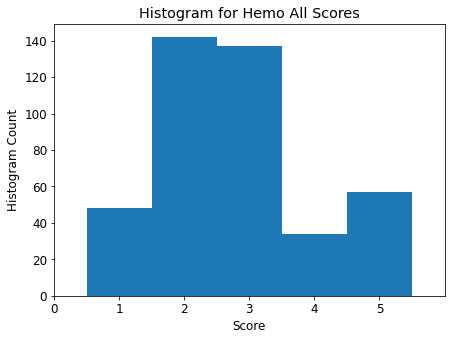

In [4]:
getScoreHist(scores=allScores, label="Hemo All Scores")

Score 1 : Count 142 , Percent 0.34
Score 2 : Count 48 , Percent 0.115
Score 3 : Count 137 , Percent 0.328
Score 4 : Count 34 , Percent 0.081
Score 5 : Count 57 , Percent 0.136


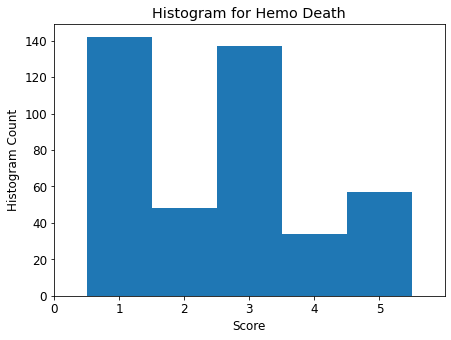

In [5]:
getScoreHist(scores=death, label="Hemo Death")

Score 1 : Count 48 , Percent 0.115
Score 2 : Count 142 , Percent 0.34
Score 3 : Count 34 , Percent 0.081
Score 4 : Count 137 , Percent 0.328
Score 5 : Count 57 , Percent 0.136


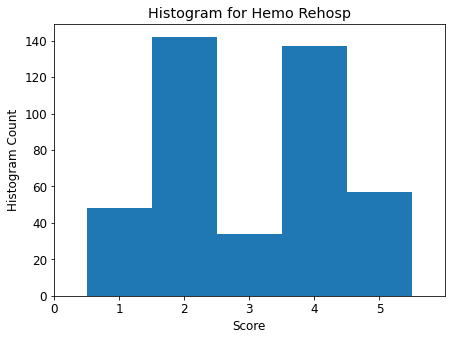

In [6]:
getScoreHist(scores=rehosp, label="Hemo Rehosp")

Score 1 : Count 48 , Percent 0.115
Score 2 : Count 137 , Percent 0.328
Score 3 : Count 142 , Percent 0.34
Score 4 : Count 57 , Percent 0.136
Score 5 : Count 34 , Percent 0.081


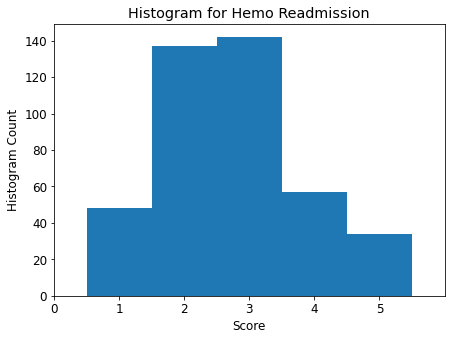

In [7]:
getScoreHist(scores=readm, label="Hemo Readmission")

## All Data

In [8]:
allDataOrig = pd.read_csv('../Data/Preprocessed Data/Cluster_AllData.csv', index_col='DEIDNUM')
allScores = allDataOrig['Score']
death = allDataOrig['ScoreDeath']
rehosp = allDataOrig['ScoreRehosp']
readm = allDataOrig['ScoreReadmission']

allDataOrig

,Age,Gender,Race,Wt,BMI,InitialHospDays,TotalHospDays,NYHA,MLHFS,AF,...,HR,PV,MAP,PP,PPP,PPRatio,Score,ScoreDeath,ScoreRehosp,ScoreReadmission
DEIDNUM,,,,,,,,,,,,,,,,,,,,,
72,88.0,2.0,1.0,57.100000,26.424175,9.0,16.0,4.0,76.0,1.0,...,104.0,12.452563,139.333333,26.0,0.276596,0.250000,2,1,1,2
72,88.0,2.0,1.0,52.000000,24.064047,9.0,16.0,3.0,76.0,1.0,...,92.0,12.452563,126.000000,26.0,0.302326,0.282609,2,1,1,2
81,69.0,1.0,1.0,102.363636,32.307675,5.0,13.0,4.0,21.0,1.0,...,70.0,-3.346568,125.333333,32.0,0.363636,0.457143,1,2,2,1
81,69.0,1.0,1.0,100.454545,31.705134,5.0,13.0,2.0,21.0,1.0,...,72.0,-3.346568,105.666667,34.0,0.441558,0.472222,1,2,2,1
86,56.0,2.0,2.0,98.636364,40.016375,3.0,3.0,4.0,NaN,0.0,...,86.0,5.478621,146.666667,30.0,0.300000,0.348837,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99302,41.0,1.0,2.0,97.400000,40.541103,21.0,21.0,NaN,79.0,0.0,...,75.0,25.535155,130.000000,55.0,0.550000,0.733333,1,2,2,1
99912,46.0,1.0,1.0,78.636364,25.677180,2.0,2.0,4.0,89.0,0.0,...,67.0,-13.911732,174.666667,38.0,0.316667,0.567164,5,5,5,5
99912,46.0,1.0,1.0,78.200000,25.534694,2.0,2.0,3.0,89.0,0.0,...,60.0,-13.911732,140.666667,24.0,0.255319,0.400000,5,5,5,5


Score 1 : Count 160 , Percent 0.185
Score 2 : Count 204 , Percent 0.236
Score 3 : Count 96 , Percent 0.111
Score 4 : Count 152 , Percent 0.176
Score 5 : Count 254 , Percent 0.293


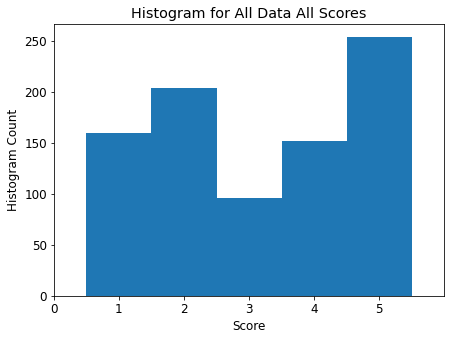

In [9]:
getScoreHist(scores=allScores, label="All Data All Scores")

Score 1 : Count 204 , Percent 0.236
Score 2 : Count 160 , Percent 0.185
Score 3 : Count 96 , Percent 0.111
Score 4 : Count 152 , Percent 0.176
Score 5 : Count 254 , Percent 0.293


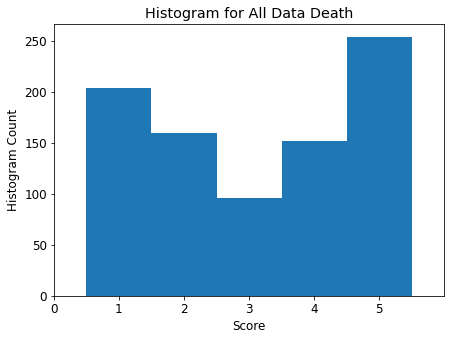

In [10]:
getScoreHist(scores=death, label="All Data Death")

Score 1 : Count 204 , Percent 0.236
Score 2 : Count 160 , Percent 0.185
Score 3 : Count 96 , Percent 0.111
Score 4 : Count 152 , Percent 0.176
Score 5 : Count 254 , Percent 0.293


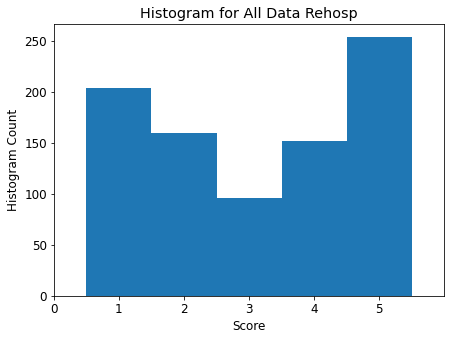

In [11]:
getScoreHist(scores=rehosp, label="All Data Rehosp")

Score 1 : Count 160 , Percent 0.185
Score 2 : Count 204 , Percent 0.236
Score 3 : Count 96 , Percent 0.111
Score 4 : Count 152 , Percent 0.176
Score 5 : Count 254 , Percent 0.293


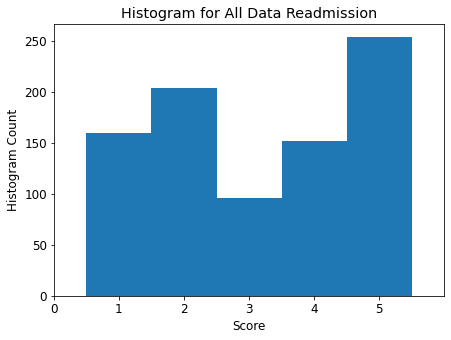

In [12]:
getScoreHist(scores=readm, label="All Data Readmission")